<a href="https://colab.research.google.com/github/yecatstevir/teambrainiac/blob/main/source/SubjectVisualization_Models_ZNORM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/gdrive')#, force_remount = True)

Mounted at /content/gdrive


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
# Clone the entire repo.
!git clone -l -s https://github.com/yecatstevir/teambrainiac.git
# Change directory into cloned repo
%cd teambrainiac/source
!ls

Cloning into 'teambrainiac'...
remote: Enumerating objects: 588, done.
remote: Counting objects: 100% (588/588), done.
remote: Compressing objects: 100% (409/409), done.
remote: Total 588 (delta 356), reused 335 (delta 163), pack-reused 0
Receiving objects: 100% (588/588), 61.73 MiB | 41.56 MiB/s, done.
Resolving deltas: 100% (356/356), done.
/content/teambrainiac/source
AccuracyMeasures.ipynb	  __init__.py
cross_validation.py	  models
data			  process.py
DL			  SingleSubjectSVM.ipynb
Explore_data.ipynb	  SVM_Group_Child_Whole_Brain.ipynb
explore.py		  SVM_Group_YA_Whole_brain.ipynb
Group_All_MASK_SVM.ipynb  utils.py
helper			  VisualizationPlayground.ipynb
Images			  Visualize_Data.ipynb


In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving path_config.py to path_config.py
User uploaded file "path_config.py" with length 228 bytes


In [7]:
# Import libraries
!pip install boto3 nilearn nibabel
import nibabel as nib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle
from utils import data_to_nib, load_mat, open_pickle, access_load_data, save_data, create_mask, labels_mask_binary, masking_data, masked_data_n_labels
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import numpy as np
import random
from nilearn.signal import clean
from utils import *
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 132 kB 26.7 MB/s 
     |████████████████████████████████| 10.1 MB 64.3 MB/s 
     |████████████████████████████████| 8.6 MB 56.9 MB/s 
     |████████████████████████████████| 79 kB 8.4 MB/s 
     |████████████████████████████████| 138 kB 66.7 MB/s 
     |████████████████████████████████| 127 kB 50.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
#open path dictionary file to get subject ids
path = "data/data_path_dictionary.pkl"
data_path_dict = open_pickle(path)
mask_data_path = data_path_dict['mask_data'][0]
mask_type_dict = access_load_data(mask_data_path,True)
np_array_mask = mask_type_dict['mask']
indices_mask = np.where(np_array_mask==1)
indices_mask

(array([ 3,  3,  3, ..., 75, 75, 75]),
 array([36, 36, 36, ..., 47, 47, 47]),
 array([33, 34, 35, ..., 28, 29, 30]))

In [9]:
subject_ids = data_path_dict['subject_ID']

In [10]:

#affine_image = nib.load('/content/drive/My Drive/data/w3rtprun_01.nii')
affine_image = access_load_data('w3rtprun_01.nii',False)
t1_image = access_load_data('single_subj_T1_resampled.nii',False)

In [11]:
viz_list = np.random.choice(subject_ids,10,replace=False)

In [50]:
path,file_beginning = ("/content/drive/My Drive/data/model_one_run_zcoreonly/",'sub_id_one_run_model_znorm')


destination_path = f"{path}{file_beginning}{subject_ids[0]}.pkl"
data = open_pickle(destination_path)
clf = data[subject_ids[0]]['model']
X_train = data[subject_ids[0]]['X_train']
y_train = data[subject_ids[0]]['y_train']

alphas = np.zeros((84))
alphas[clf.support_] = clf.dual_coef_
alphas = alphas.reshape(1,-1)
bmap = np.dot(alphas,X_train)
bmap2 = np.zeros((79,95,79))
bmap2[indices_mask] = bmap
bmap2 = np.zeros((79,95,79))
bmap2[indices_mask] = bmap
bmap3 = nib.Nifti1Image(bmap2,affine=affine_image.affine,header=affine_image.header)

In [52]:
print(affine_image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  79  95  79 144   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Warped'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 78.0
qoffset_y       : -112.0
qoffset_z       : -70.0
srow_x          : [-2.  0.  0. 78.]

In [55]:
def create_bmaps(sub_id,data,indices_mask,image):
  path,file_beginning = ("/content/drive/My Drive/data/model_one_run_zcoreonly/",'sub_id_one_run_model_znorm')

  
  destination_path = f"{path}{file_beginning}{subject_ids[0]}.pkl"
  model_dict = open_pickle(destination_path)
  clf = data[sub_id]['model']
  X_train = data[sub_id]['X_train']
  y_train = data[sub_id]['y_train']

  alphas = np.zeros((84))
  alphas[clf.support_] = clf.dual_coef_
  alphas = alphas.reshape(1,-1)
  bmap = np.dot(alphas,X_train)
  bmap2 = np.zeros((79,95,79))
  bmap2[indices_mask] = bmap
  bmap2 = np.zeros((79,95,79))
  bmap2[indices_mask] = bmap
  bmap3 = nib.Nifti1Image(bmap2,affine=image.affine,header=image.header)
  return bmap3
  

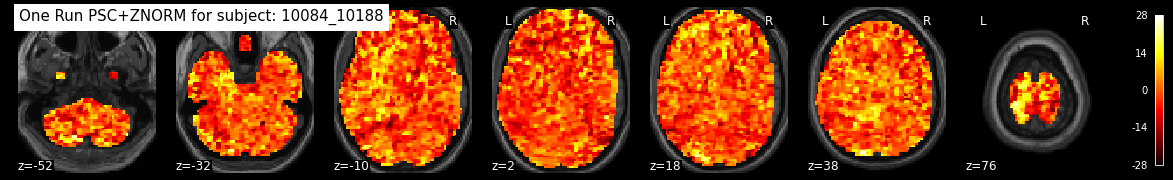

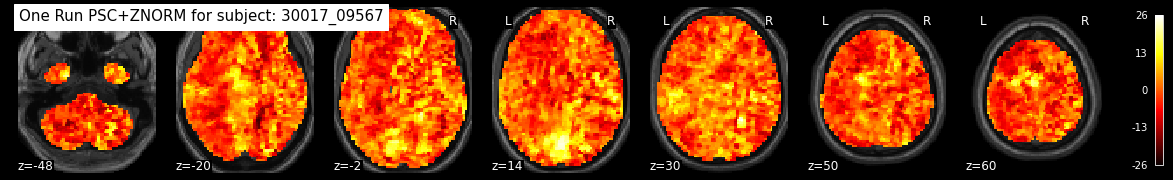

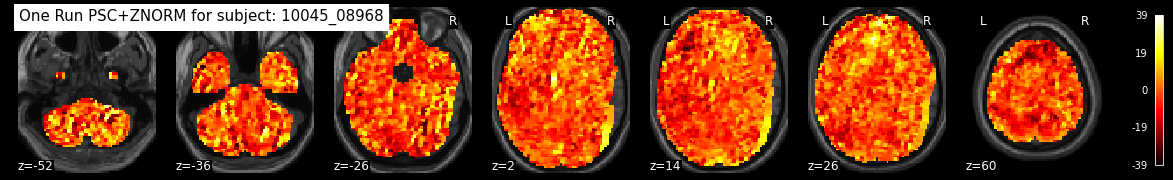

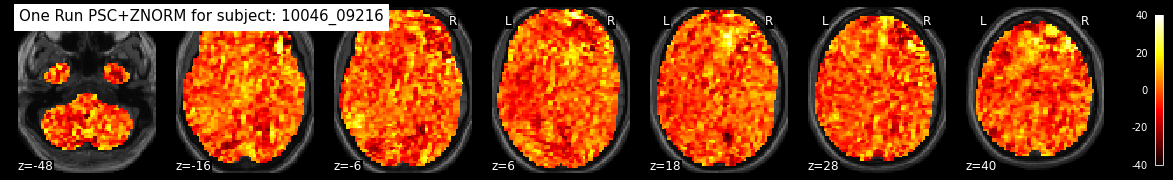

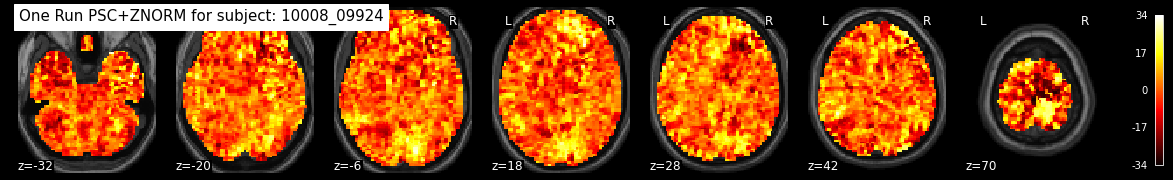

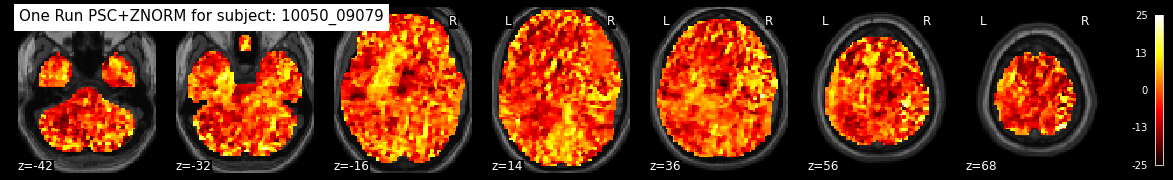

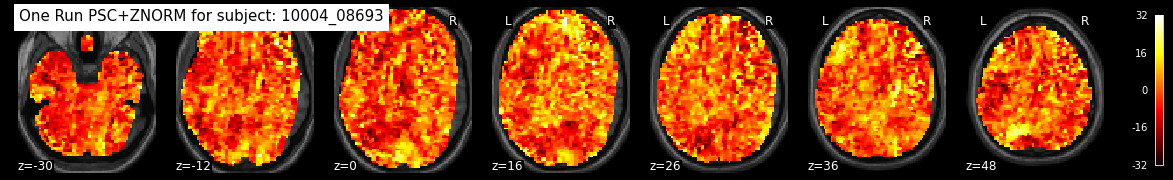

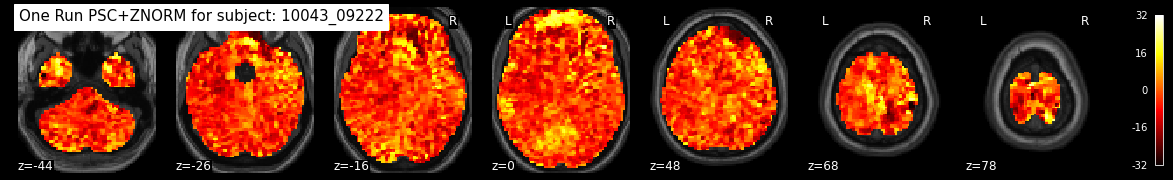

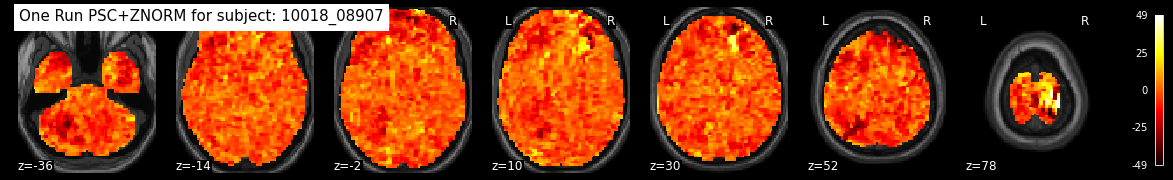

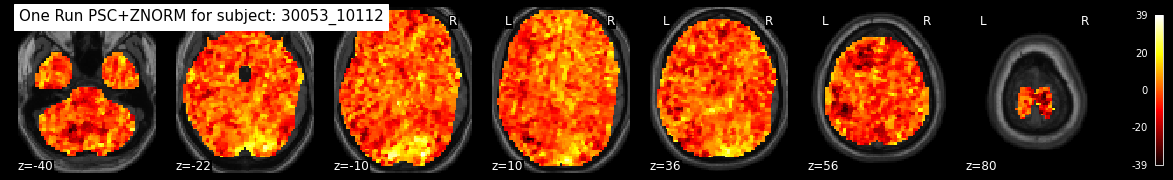

In [56]:
from nilearn import plotting, image
for sub_id in viz_list:
  path,file_beginning = ("/content/drive/My Drive/data/model_one_run_zcoreonly/",'sub_id_one_run_model_znorm')

  
  destination_path = f"{path}{file_beginning}{sub_id}.pkl"
  model_dict = open_pickle(destination_path)
  #print(model_dict[subj]['y_train'])
  bmap3 = create_bmaps(sub_id,model_dict,indices_mask,affine_image)
  display = plotting.plot_stat_map(bmap3, bg_img = t1_image,
                                 colorbar=True, cmap='hot', display_mode='z',
                                 title=f"One Run PSC+ZNORM for subject: {sub_id}")

In [31]:
from nilearn.image import threshold_img
def get_threshold_image(bmap3):
  # Two types of strategies can be used from this threshold function
  # Type 1: strategy used will be based on scoreatpercentile
  threshold_percentile_img = threshold_img(bmap3, threshold='98%', copy=False)


  # Type 2: threshold strategy used will be based on image intensity
  # Here, threshold value should be within the limits i.e. less than max value.
  threshold_value_img = threshold_img(bmap3, threshold=3.0, copy=False)
  return threshold_percentile_img,threshold_value_img

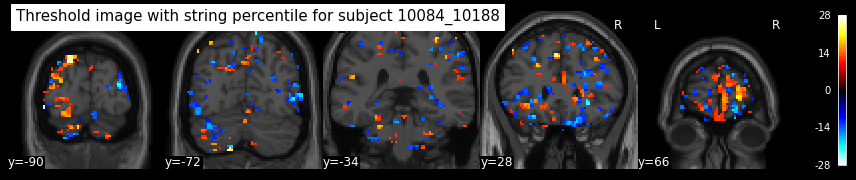

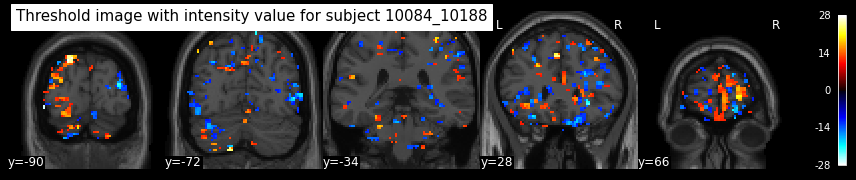

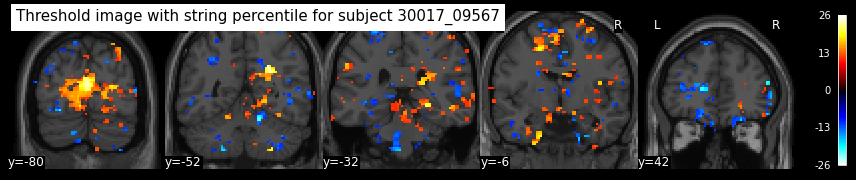

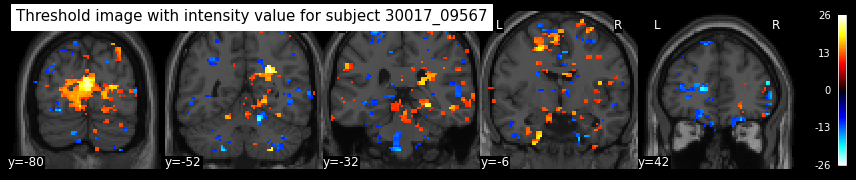

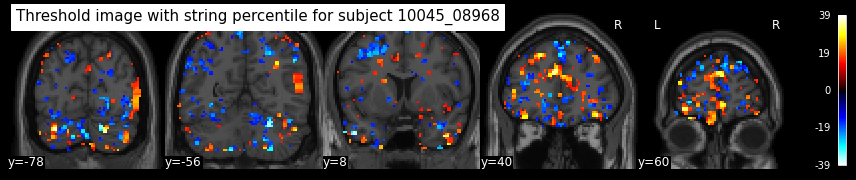

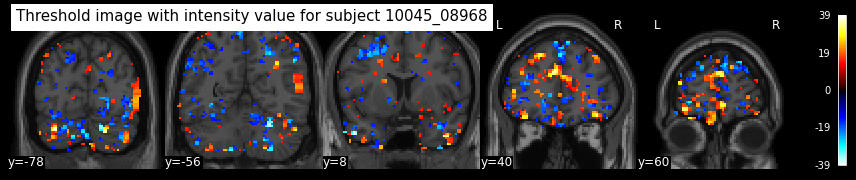

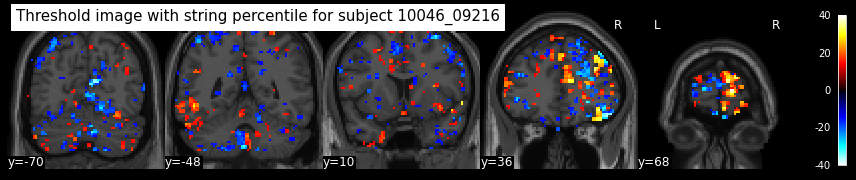

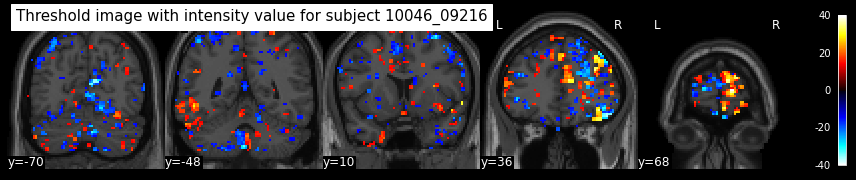

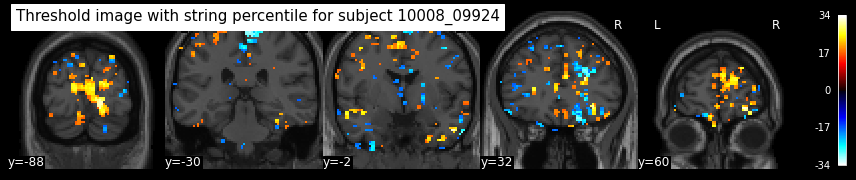

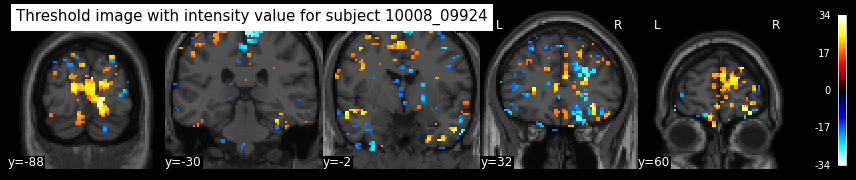

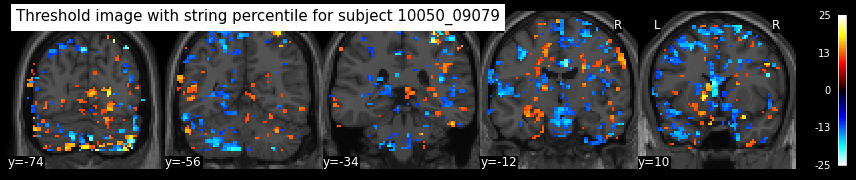

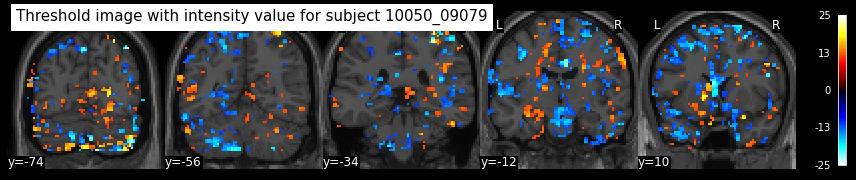

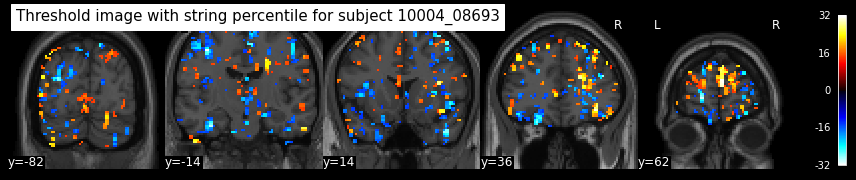

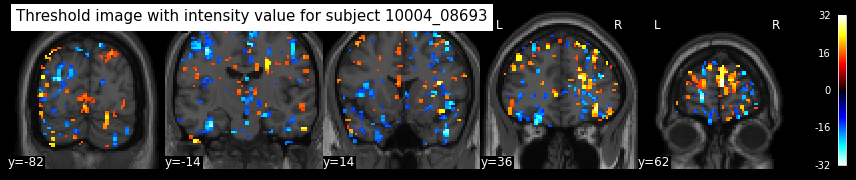

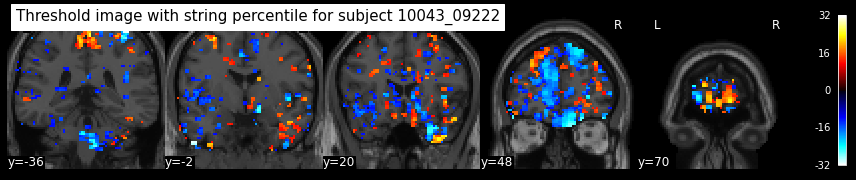

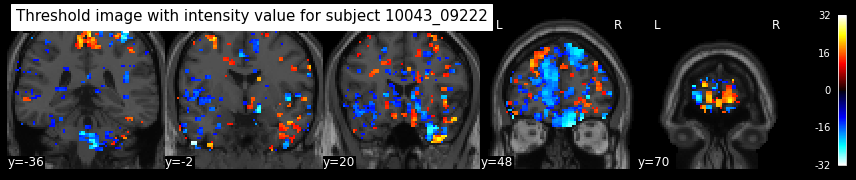

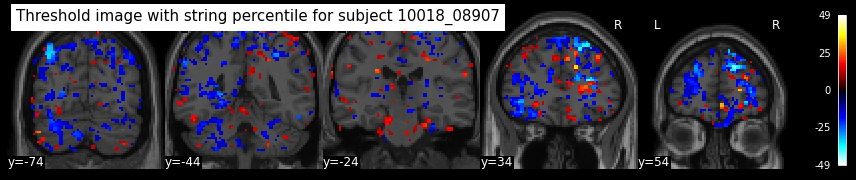

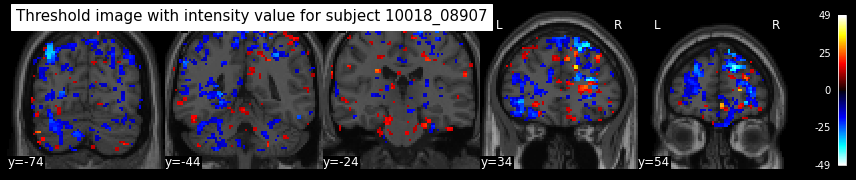

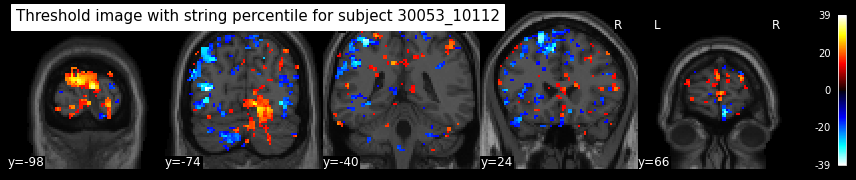

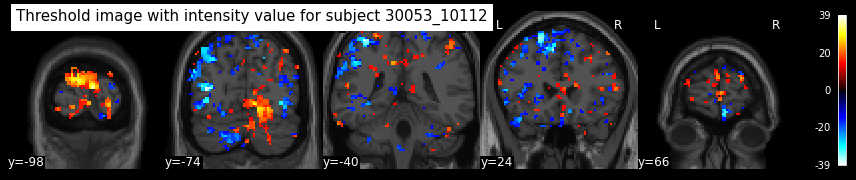

In [32]:
for sub_id in viz_list:
  path,file_beginning = path,file_beginning = ("/content/drive/My Drive/data/model_one_run_zcoreonly/",'sub_id_one_run_model_znorm')

  
  destination_path = f"{path}{file_beginning}{sub_id}.pkl"
  model_dict = open_pickle(destination_path)
  #print(model_dict[subj]['y_train'])
  bmap3 = create_bmaps(sub_id,model_dict,indices_mask,affine_image)
  threshold_percentile_img,threshold_value_img = get_threshold_image(bmap3)
  plotting.plot_stat_map(threshold_percentile_img, bg_img = t1_image, display_mode='y', cut_coords=5,
                       title=f'Threshold image with string percentile for subject {sub_id}', colorbar=True)

# Showing intensity threshold image
  plotting.plot_stat_map(threshold_value_img, bg_img = t1_image, display_mode='y', cut_coords=5,
                       title=f'Threshold image with intensity value for subject {sub_id}', colorbar=True)

In [16]:
def plot_alphas(alphas,alpha_labels):
  fig, ax = plt.subplots(1,1,figsize=(15, 5))
  ax.plot(alphas, lw=3, label='scaled voxel tc')
  ax.plot(alphas_labels, lw=3, label='predictor tc')
  #ax.set_xlim(0, acq_num-1)
  ax.set_xlabel('time [volumes]', fontsize=20)
  ax.tick_params(labelsize=12)
  ax.set_title(sub_id)
  ax.legend()
  plt.show()

In [17]:
def get_alphas(sub_id,data):
  clf = data[sub_id]['model']
  X_train = data[sub_id]['X_train']
  y_train = data[sub_id]['y_train']

  alphas = np.zeros((84))
  alphas[clf.support_] = clf.dual_coef_
  #alphas = alphas.reshape(1,-1)
  return alphas,y_train

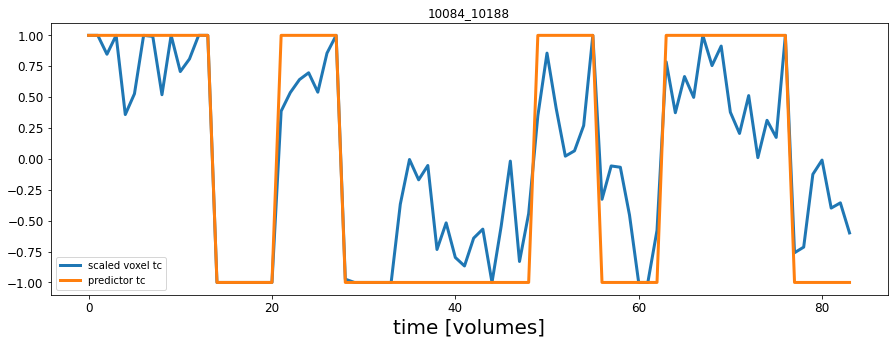

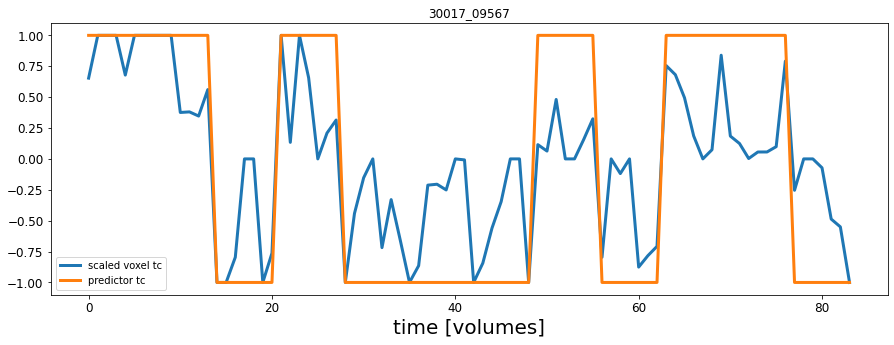

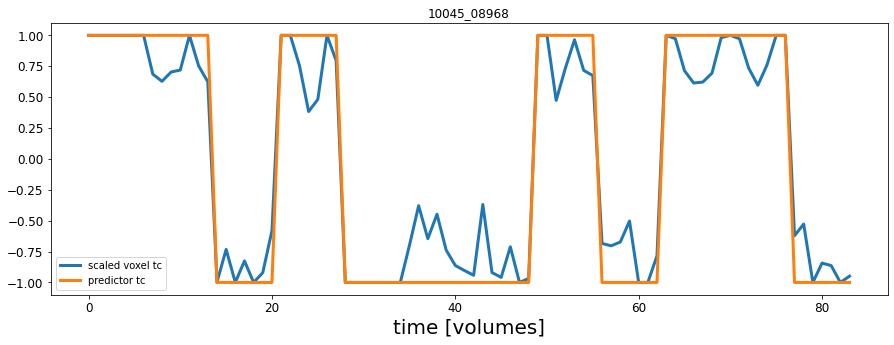

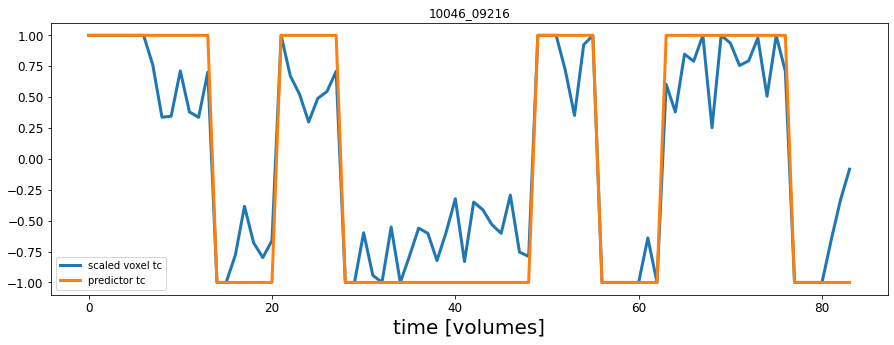

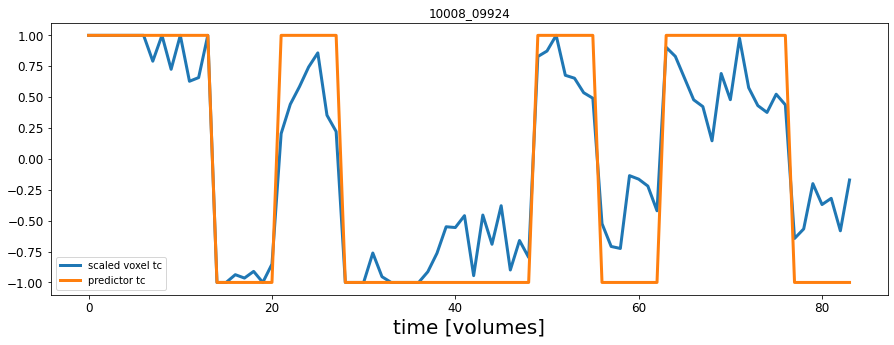

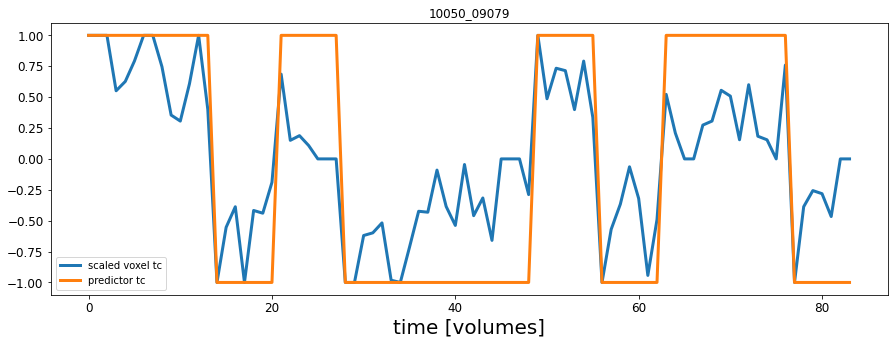

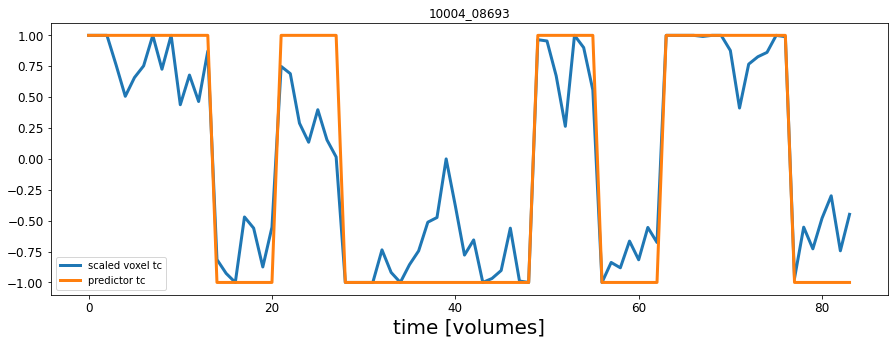

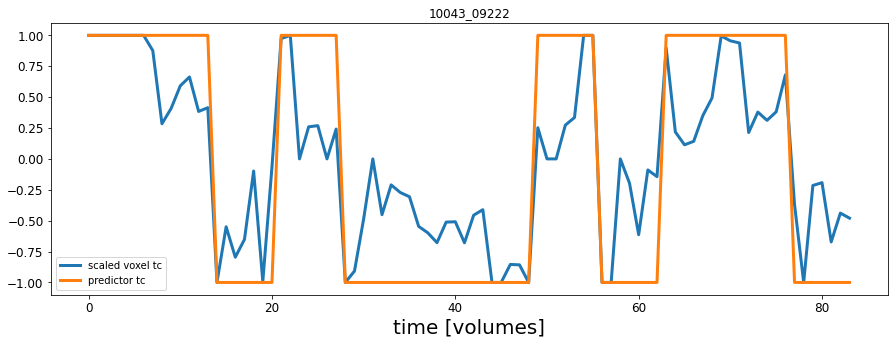

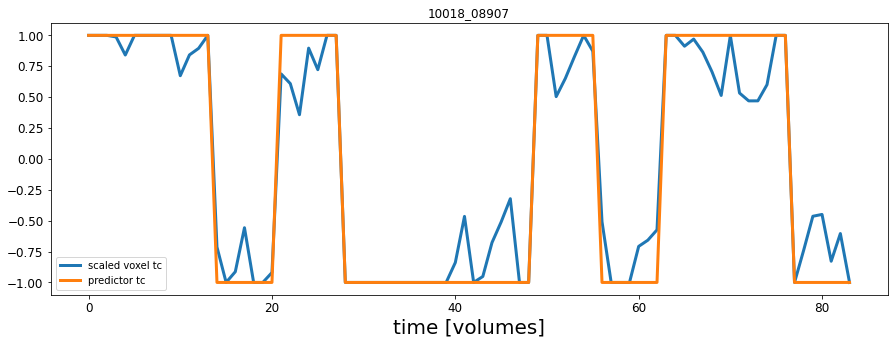

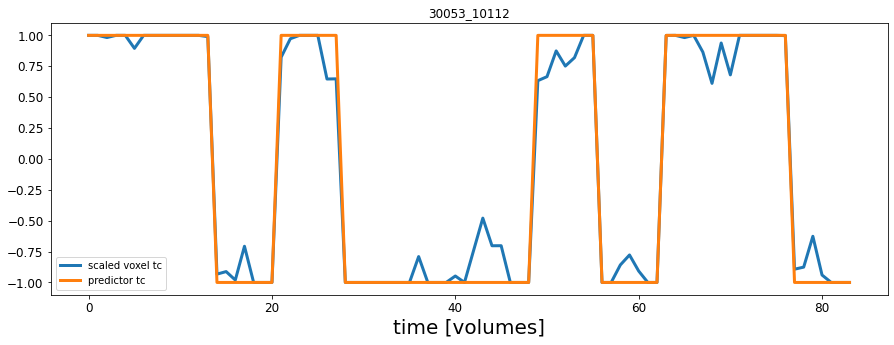

In [18]:
for sub_id in viz_list:
  path,file_beginning = ("/content/drive/My Drive/data/model_one_run_zcoreonly/",'sub_id_one_run_model_znorm')
  destination_path = f"{path}{file_beginning}{sub_id}.pkl"
  model_dict = open_pickle(destination_path)
  alphas,y_train= get_alphas(sub_id,model_dict)
  alphas_labels = np.where(y_train==0,-1,1)
  plot_alphas(alphas,alphas_labels)


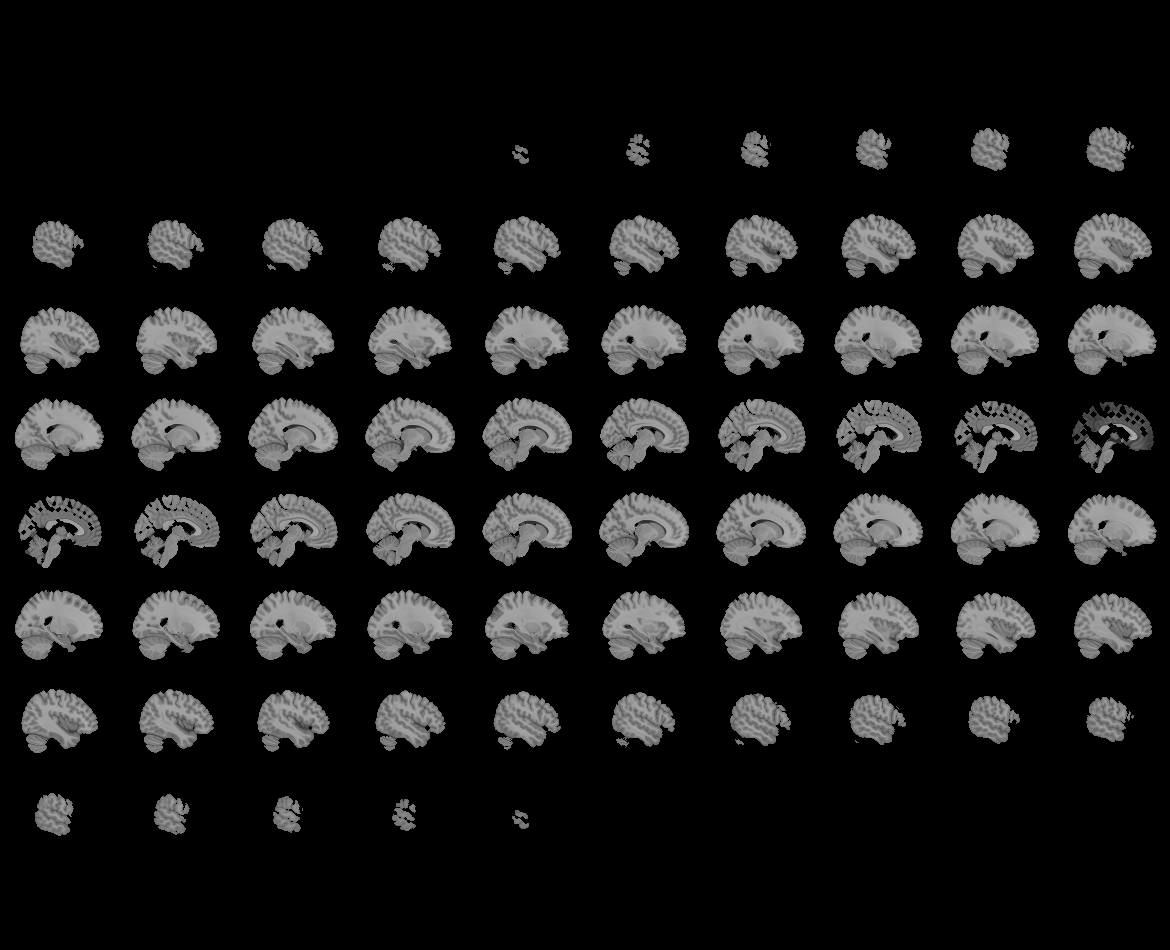
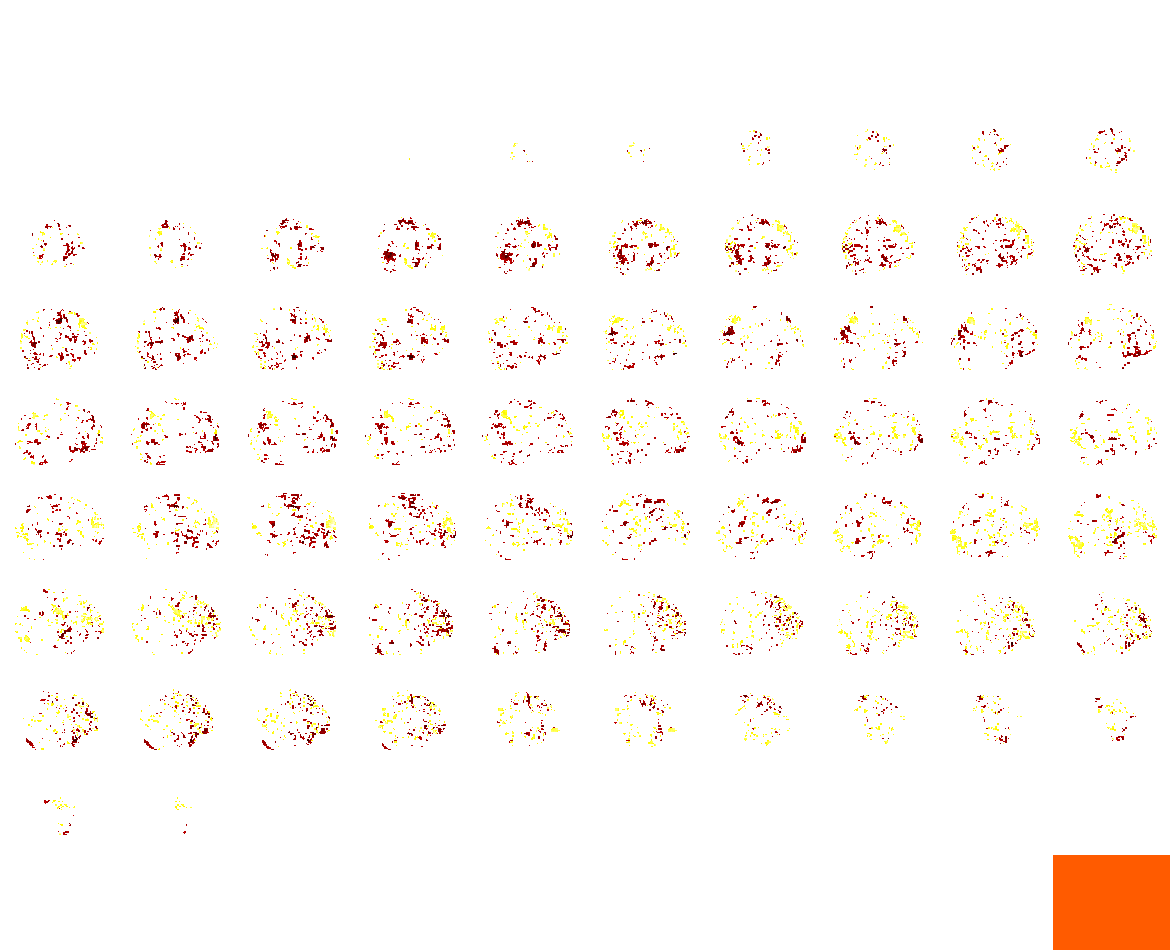

In [41]:
###just for fun
sub_id = '30017_09567'
from nilearn import plotting, datasets  
# #for sub_id in subject_ids:
#   path,file_beginning = ("/content/drive/My Drive/data/model_one_run_zcoreonly/",'sub_id_one_run_model_znorm')
#   destination_path = f"{path}{file_beginning}{sub_id}.pkl"
#   model_dict = open_pickle(destination_path)
#   bmap3 = create_bmaps(sub_id,model_dict,indices_mask,affine_image)  
#>>> img = datasets.fetch_localizer_button_task()['tmap']     
html_view = plotting.view_img(bmap3, bg=t1_image, threshold='95%', cmap = 'hot', cut_coords=[-10, 13, -8],
                                    title="Motor contrast")
html_view  